<a href="https://colab.research.google.com/github/jclee0109/deep_learning_self_study/blob/main/3_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""
# 특성 공학과 규제
"""
"""
## 데이터 준비
"""

'\n## 데이터 준비\n'

In [28]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [29]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [30]:
"""
## 사이킷런의 변환기
"""
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

[[1. 2. 3. 4. 6. 9.]]
(42, 9)


In [31]:
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
test_poly = poly.transform(test_input)

In [33]:
"""
## 다중 회귀 무델 훈련하기
"""
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9883022524169436
0.9883882224931926


In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(train_input)
# TODO : fit이랑 transform 의 차이점을 정확하게는 모르겠어
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.999999999999955
-160.95659215695773


feature가 degree 5가 돼서 총 55개가 생성됐음!  
그래서 train set에 대해서는 엄청 큰 정확도를 보이지만, test set에 대해서는 점수가 엄청엄청 낮음!  
OverFitting! -> Regularizaion으로 해결 -> sklearn.preprocssing import StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

방금까지는 StandardScaler로 특정 feature가 너무 큰 값(scale)을 가지면 문제가 생길 수 있어서, 그에 관한 규제를 해줬어! 이전에 배운 Z-scale과 비슷한 원리인듯
### 이제부터 릿지 회귀!! & 랏쏘 회귀 (Ridge & Lasso Regression)

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9878368896355618
0.9926408271273736


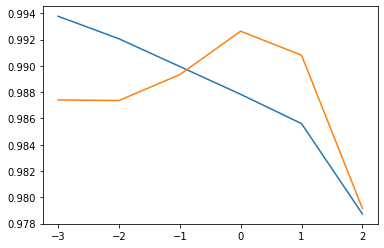

In [39]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지모델을 만들고
    ridge = Ridge(alpha=alpha)
    # 릿지모델을 훈련
    ridge.fit(train_scaled, train_target)
    train_scores.append(ridge.score(train_scaled, train_target))
    test_scores.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_scores)
plt.plot(np.log10(alpha_list), test_scores)
plt.show()

그래프로 alpha에 따른 train, test score를 비교해봤는데, train, test 둘 다 동일하게 잘 나와야 괜찮은 alpha라고 할 수 있을 거 같음!! 그래서 log10(-1)로 잡고 alpha=0.1로 하는게 좋겠다라는 판단!

In [40]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9899522399014545
0.9893331514171694


방금까지는 Ridge 모델을 이용해봤고, 앞으로는 Lasso를 이용해 볼 것임! Ridge와 Lasso에 가장 큰 차이점은 Ridge는 계수를 제곱해서 너무 큰 값을 갖지 않게 0에 수렵하도록 도와주고, Lasso는 계수의 절대값을 기준으로 규제를 적용해서 너무 큰 값을 갖지않게 규제를 가해주는 거야

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9872884006292401
0.9927061040637105


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+03, tolerance: 5.542e+02
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.628e+04, tolerance: 5.542e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.421e+04, tolerance: 5.542e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.019e+03, tolerance: 5.542e+02

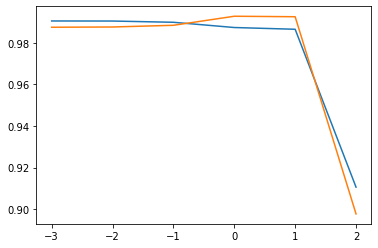

In [43]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_scores.append(lasso.score(train_scaled, train_target))
    test_scores.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_scores)
plt.plot(np.log10(alpha_list), test_scores)
plt.show()

In [45]:
lasso = Lasso(alpha=0.1)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989803003498125
0.9883547974083724


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.019e+03, tolerance: 5.542e+02
  model = cd_fast.enet_coordinate_descent(


In [47]:
print(np.sum(lasso.coef_ == 0))

31
